In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

In [2]:
df = pd.read_csv('world_bank_data_2025.csv')

In [3]:
df.head()

,country_name,country_id,year,Inflation (CPI %),GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
0,Aruba,aw,2010,2.078141,2.453597e+09,24093.140151,NaN,11.666131,-1.223407,-2.733457,-18.752537,NaN,NaN,NaN,2.313385e+09,NaN
1,Aruba,aw,2011,4.316297,2.637859e+09,25712.384302,NaN,4.801974,4.005674,3.369237,-9.877656,NaN,NaN,NaN,2.391841e+09,NaN
2,Aruba,aw,2012,0.627472,2.615208e+09,25119.665545,NaN,8.200875,0.184033,-1.040800,3.473451,NaN,NaN,NaN,2.499118e+09,NaN
3,Aruba,aw,2013,-2.372065,2.727850e+09,25813.576727,NaN,10.709709,-1.995948,6.431483,-11.813206,NaN,NaN,NaN,2.563517e+09,NaN
4,Aruba,aw,2014,0.421441,2.790850e+09,26129.839062,NaN,3.213869,3.958897,-1.586575,-4.658577,NaN,NaN,NaN,2.688102e+09,NaN


In [4]:
df.shape

(3472, 16)

In [5]:
df.columns.tolist()

['country_name',
 'country_id',
 'year',
 'Inflation (CPI %)',
 'GDP (Current USD)',
 'GDP per Capita (Current USD)',
 'Unemployment Rate (%)',
 'Interest Rate (Real, %)',
 'Inflation (GDP Deflator, %)',
 'GDP Growth (% Annual)',
 'Current Account Balance (% GDP)',
 'Government Expense (% of GDP)',
 'Government Revenue (% of GDP)',
 'Tax Revenue (% of GDP)',
 'Gross National Income (USD)',
 'Public Debt (% of GDP)']

In [6]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
print(df.columns)

Index(['country_name', 'country_id', 'year', 'inflation_(cpi_%)',
       'gdp_(current_usd)', 'gdp_per_capita_(current_usd)',
       'unemployment_rate_(%)', 'interest_rate_(real,_%)',
       'inflation_(gdp_deflator,_%)', 'gdp_growth_(%_annual)',
       'current_account_balance_(%_gdp)', 'government_expense_(%_of_gdp)',
       'government_revenue_(%_of_gdp)', 'tax_revenue_(%_of_gdp)',
       'gross_national_income_(usd)', 'public_debt_(%_of_gdp)'],
      dtype='object')


In [7]:
df.rename(columns={
    'country_name': 'country',
    'country_id': 'country_code',
    'year': 'year',
    'inflation_(cpi_%)': 'cpi',
    'gdp_(current_usd)': 'gdp',
    'gdp_per_capita_(current_usd)': 'gdp_per_capita',
    'unemployment_rate_(%)': 'unemployment_rate',
    'interest_rate_(real,_%)': 'real_interest_rate',
    'inflation_(gdp_deflator,_%)': 'gdp_deflator',
    'gdp_growth_(%_annual)': 'gdp_growth',
    'current_account_balance_(%_gdp)': 'current_account_balance',
    'government_expense_(%_of_gdp)': 'gov_expense',
    'government_revenue_(%_of_gdp)': 'gov_revenue',
    'tax_revenue_(%_of_gdp)': 'tax_revenue',
    'gross_national_income_(usd)': 'gni',
    'public_debt_(%_of_gdp)': 'public_debt',
}, inplace=True)

In [8]:
df.columns

Index(['country', 'country_code', 'year', 'cpi', 'gdp', 'gdp_per_capita',
       'unemployment_rate', 'real_interest_rate', 'gdp_deflator', 'gdp_growth',
       'current_account_balance', 'gov_expense', 'gov_revenue', 'tax_revenue',
       'gni', 'public_debt'],
      dtype='object')

In [9]:
df.drop(['country_code'], axis=1, inplace=True)

In [10]:
df.columns

Index(['country', 'year', 'cpi', 'gdp', 'gdp_per_capita', 'unemployment_rate',
       'real_interest_rate', 'gdp_deflator', 'gdp_growth',
       'current_account_balance', 'gov_expense', 'gov_revenue', 'tax_revenue',
       'gni', 'public_debt'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  3472 non-null   object 
 1   year                     3472 non-null   int64  
 2   cpi                      2694 non-null   float64
 3   gdp                      2933 non-null   float64
 4   gdp_per_capita           2938 non-null   float64
 5   unemployment_rate        2795 non-null   float64
 6   real_interest_rate       1735 non-null   float64
 7   gdp_deflator             2904 non-null   float64
 8   gdp_growth               2912 non-null   float64
 9   current_account_balance  2563 non-null   float64
 10  gov_expense              1820 non-null   float64
 11  gov_revenue              1829 non-null   float64
 12  tax_revenue              1833 non-null   float64
 13  gni                      2796 non-null   float64
 14  public_debt             

In [12]:
df.isnull().sum()

,0
country,0
year,0
cpi,778
gdp,539
gdp_per_capita,534
unemployment_rate,677
real_interest_rate,1737
gdp_deflator,568
gdp_growth,560
current_account_balance,909


In [13]:
for col in df.select_dtypes(include=np.number).columns:
    df.fillna({col: df[col].median()}, inplace=True)

df.isnull().sum()

,0
country,0
year,0
cpi,0
gdp,0
gdp_per_capita,0
unemployment_rate,0
real_interest_rate,0
gdp_deflator,0
gdp_growth,0
current_account_balance,0


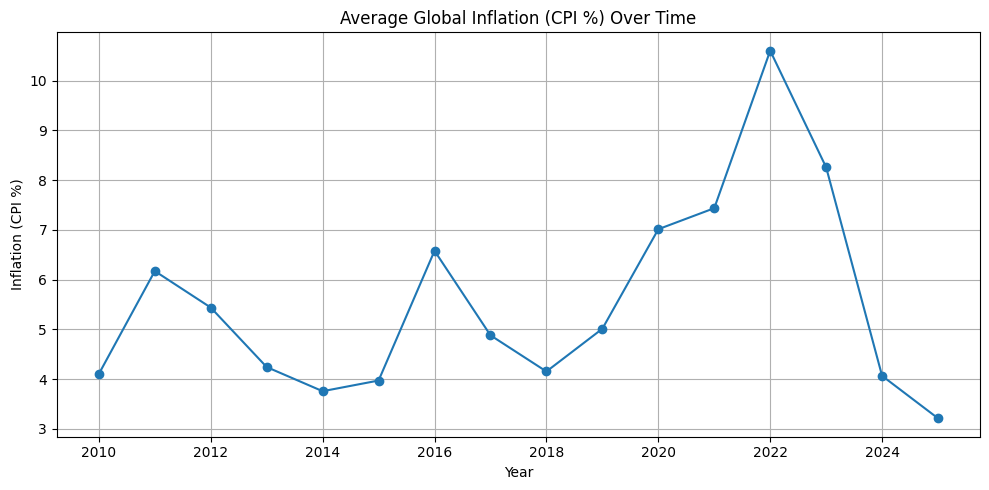

In [14]:
plt.figure(figsize=(10, 5))
df.groupby('year')['cpi'].mean().plot(marker='o')
plt.title('Average Global Inflation (CPI %) Over Time')
plt.ylabel('Inflation (CPI %)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

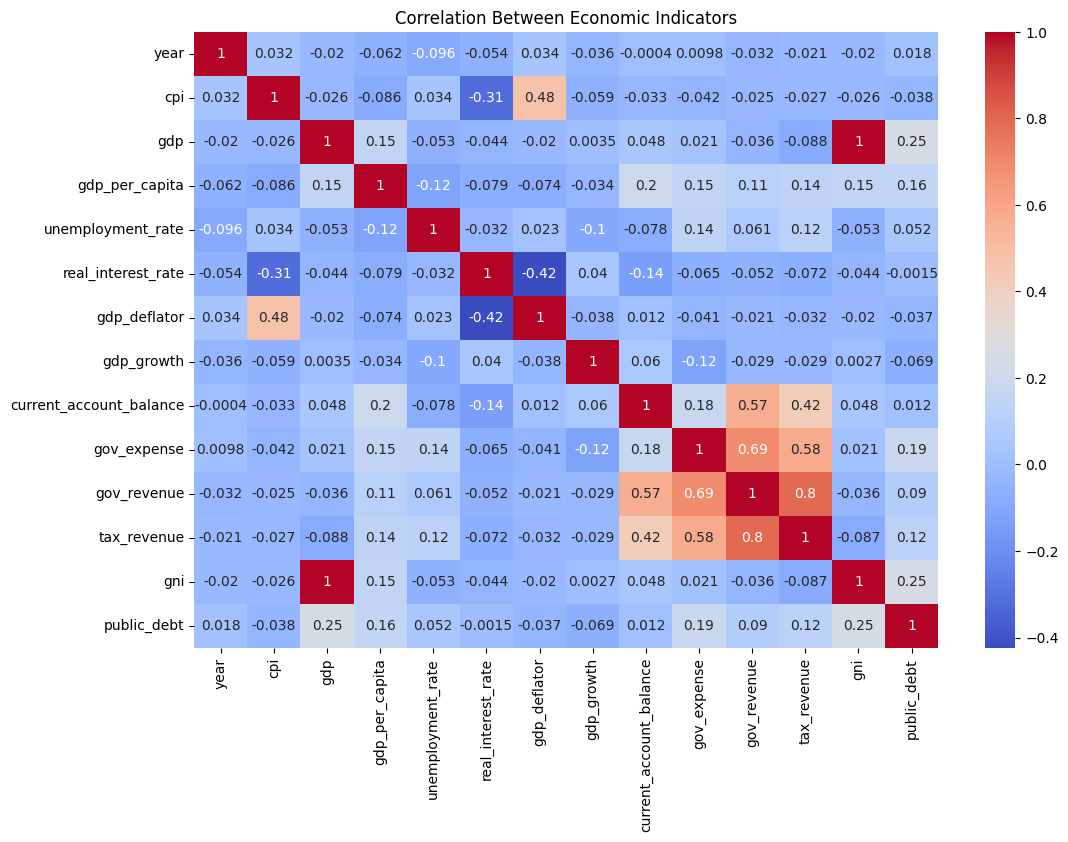

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['country']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Economic Indicators')
plt.show()


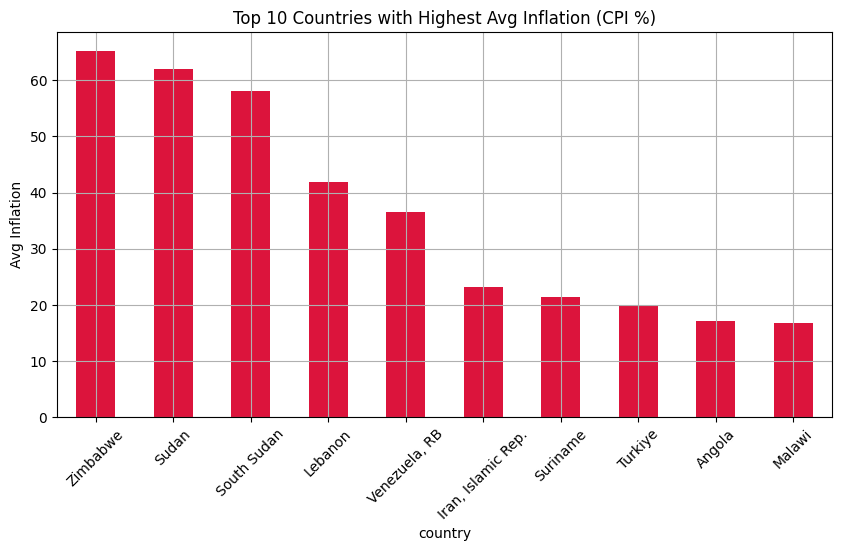

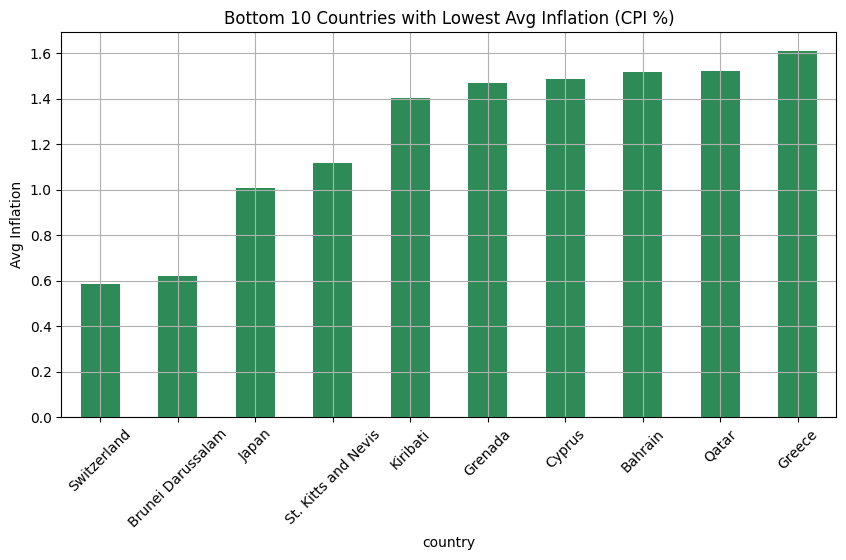

In [16]:
# Top 10
top10 = df.groupby('country')['cpi'].mean().sort_values(ascending=False).head(10)
top10.plot(kind='bar', figsize=(10,5), title='Top 10 Countries with Highest Avg Inflation (CPI %)', color='crimson')
plt.ylabel('Avg Inflation')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bottom 10
bottom10 = df.groupby('country')['cpi'].mean().sort_values().head(10)
bottom10.plot(kind='bar', figsize=(10,5), title='Bottom 10 Countries with Lowest Avg Inflation (CPI %)', color='seagreen')
plt.ylabel('Avg Inflation')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

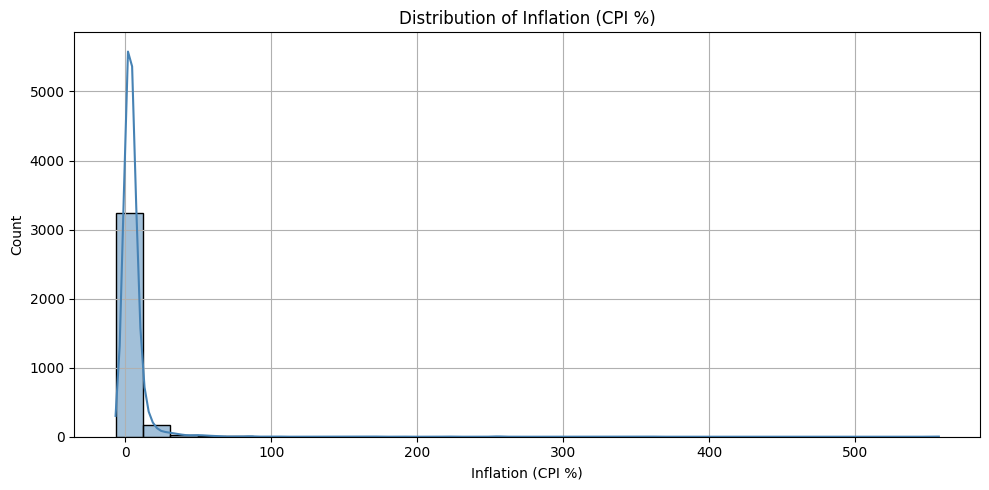

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(df['cpi'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Inflation (CPI %)')
plt.xlabel('Inflation (CPI %)')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-154184859.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range_counts.index, y=range_counts.values, palette='magma')


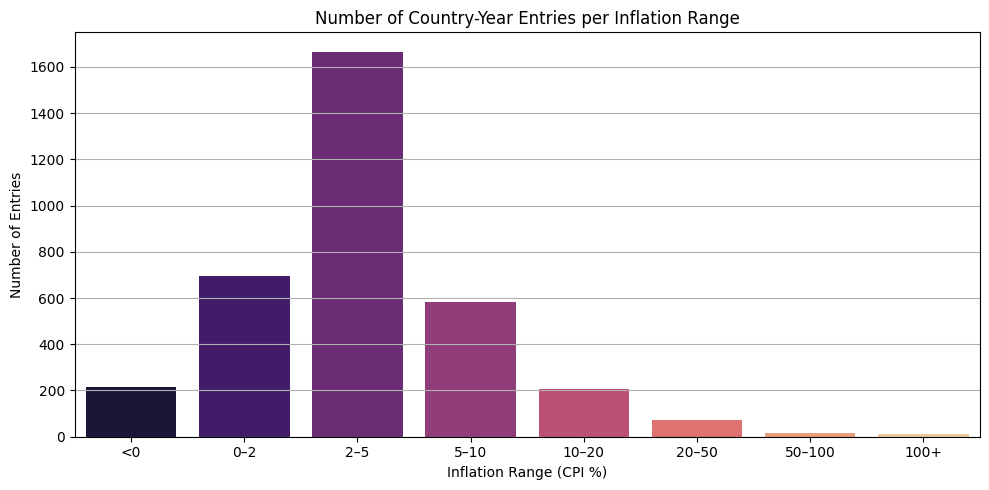

In [18]:
inflation_bins = [-10, 0, 2, 5, 10, 20, 50, 100, 1000]
bin_labels = ['<0', '0–2', '2–5', '5–10', '10–20', '20–50', '50–100', '100+']
df['inflation_range'] = pd.cut(df['cpi'], bins=inflation_bins, labels=bin_labels)
range_counts = df['inflation_range'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=range_counts.index, y=range_counts.values, palette='magma')
plt.title('Number of Country-Year Entries per Inflation Range')
plt.xlabel('Inflation Range (CPI %)')
plt.ylabel('Number of Entries')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


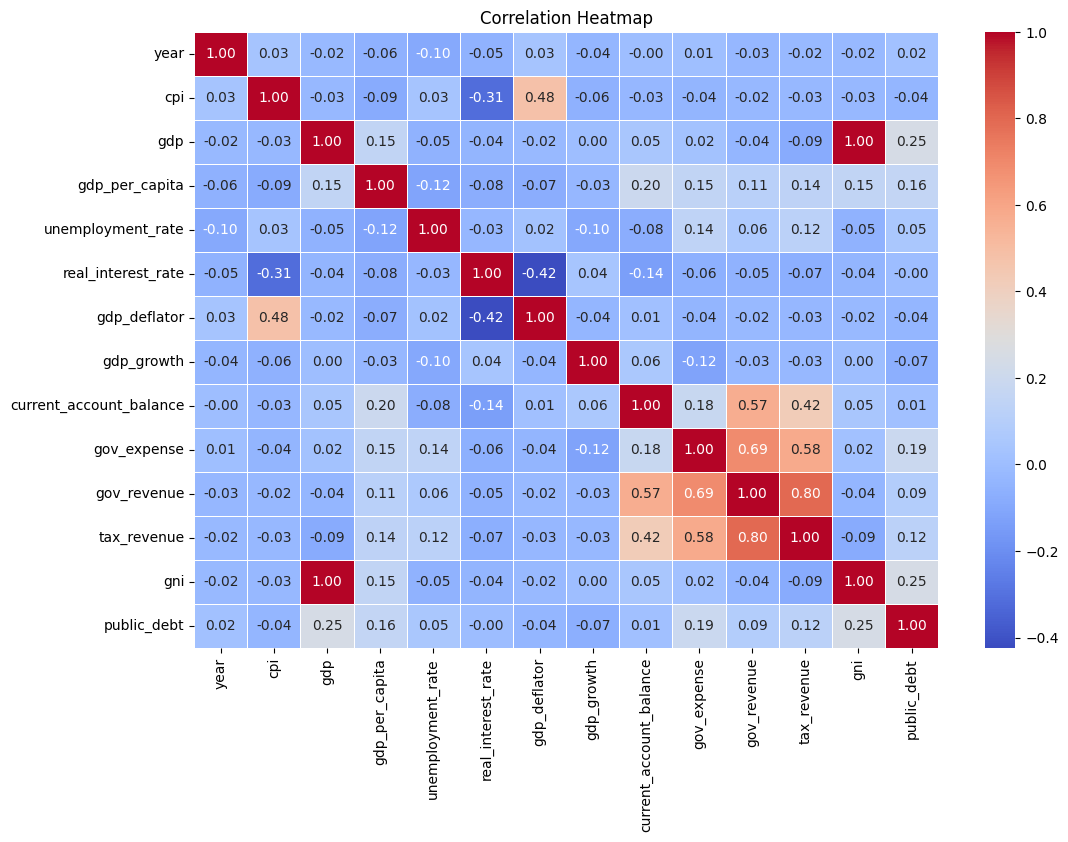

In [19]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


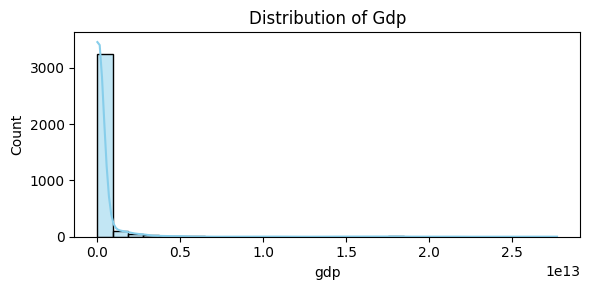

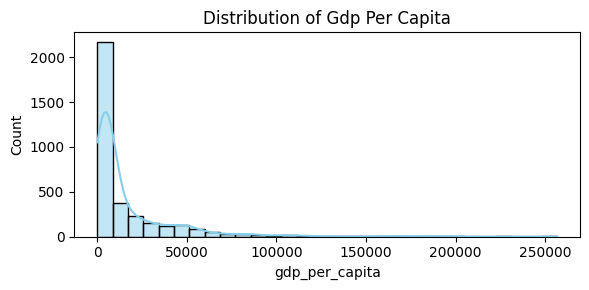

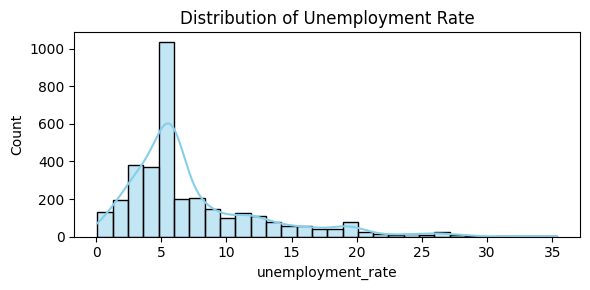

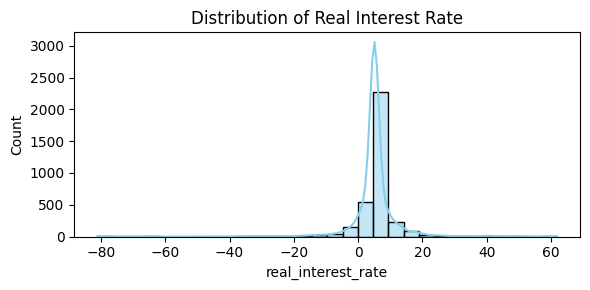

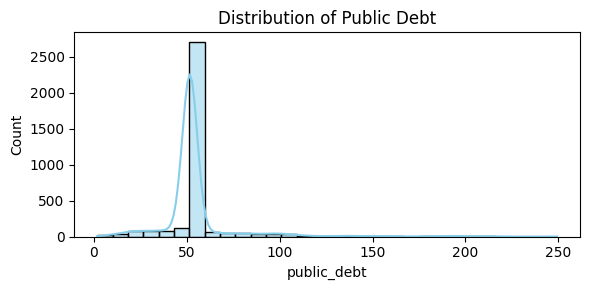

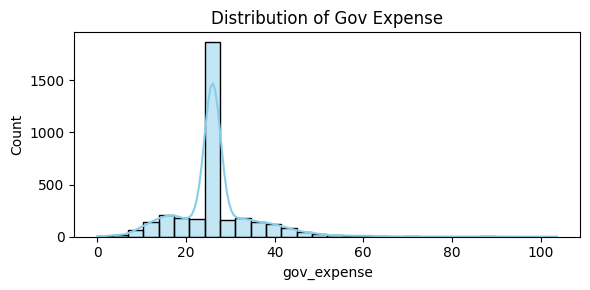

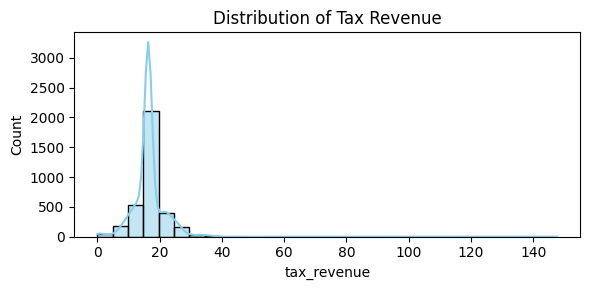

In [20]:
key_features = ['gdp', 'gdp_per_capita', 'unemployment_rate', 'real_interest_rate',
                'public_debt', 'gov_expense', 'tax_revenue']

for col in key_features:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [21]:
df['debt_to_gdp_ratio'] = df['public_debt'] / df['gdp']
df['gdp_growth_per_capita'] = df['gdp_growth'] / df['gdp_per_capita']
df['gov_balance'] = df['gov_revenue'] - df['gov_expense']


In [22]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [23]:
for col in ['debt_to_gdp_ratio', 'gdp_growth_per_capita', 'gov_balance']:
    if col in df.columns:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

/tmp/ipython-input-3995214593.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [24]:
df.columns

Index(['country', 'year', 'cpi', 'gdp', 'gdp_per_capita', 'unemployment_rate',
       'real_interest_rate', 'gdp_deflator', 'gdp_growth',
       'current_account_balance', 'gov_expense', 'gov_revenue', 'tax_revenue',
       'gni', 'public_debt', 'inflation_range', 'debt_to_gdp_ratio',
       'gdp_growth_per_capita', 'gov_balance'],
      dtype='object')

In [25]:
y = df['cpi']
feature_columns = [
    'gdp', 'gdp_per_capita', 'unemployment_rate', 'real_interest_rate',
    'gdp_deflator', 'gdp_growth', 'current_account_balance', 'gov_expense',
    'gov_revenue', 'tax_revenue', 'gni', 'public_debt',
    'debt_to_gdp_ratio', 'gdp_growth_per_capita', 'gov_balance'
]
X = df[feature_columns]


In [26]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (3472, 15)
Shape of y: (3472,)


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns)


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42
)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R^2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Results:
RMSE: 11.096919817540284
R^2 Score: 0.45102535046129244


In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R^2 Score:", r2_score(y_test, y_pred_rf))



Random Forest Results:
RMSE: 7.954841153487077
R^2 Score: 0.7178952375887975


In [31]:
from xgboost import XGBRegressor
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.3,
    reg_lambda=0.7,
    random_state=42
)

xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [32]:
y_pred_xgb = xgb.predict(X_test)

In [33]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor Results")
print("-------------------------")
print(f"RMSE     : {rmse_xgb:.4f}")
print(f"R² Score : {r2_xgb:.4f}")


XGBoost Regressor Results
-------------------------
RMSE     : 12.8437
R² Score : 0.2646


In [35]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 19.4 MB/s eta 0:00:00


In [36]:
import optuna
import warnings
warnings.filterwarnings("ignore")

In [44]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 2000),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0)
    }
    model = XGBRegressor(**params, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

In [45]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=150, show_progress_bar=True)

[I 2025-08-03 18:46:01,466] A new study created in memory with name: no-name-3c07ac1b-2585-4214-ab88-512284fd9f03


  0%|          | 0/150 [00:00<?, ?it/s]

[I 2025-08-03 18:46:02,492] Trial 0 finished with value: 13.977789478305544 and parameters: {'n_estimators': 826, 'max_depth': 6, 'learning_rate': 0.0355877001899848, 'subsample': 0.9026939926725973, 'colsample_bytree': 0.7252713911552862, 'gamma': 3.3032289940183848, 'reg_alpha': 0.2747916815419026, 'reg_lambda': 0.38955788146087533}. Best is trial 0 with value: 13.977789478305544.
[I 2025-08-03 18:46:03,142] Trial 1 finished with value: 14.307503615524578 and parameters: {'n_estimators': 1230, 'max_depth': 4, 'learning_rate': 0.11818703036645269, 'subsample': 0.9934530161439241, 'colsample_bytree': 0.663494856034635, 'gamma': 0.6423905644382555, 'reg_alpha': 0.14174240022749263, 'reg_lambda': 0.6452779996571282}. Best is trial 0 with value: 13.977789478305544.
[I 2025-08-03 18:46:05,276] Trial 2 finished with value: 19.93852912393966 and parameters: {'n_estimators': 1405, 'max_depth': 9, 'learning_rate': 0.22666837591713182, 'subsample': 0.5265319476501021, 'colsample_bytree': 0.6767

In [46]:
# Step 5: Train final model using best hyperparameters
print("Best RMSE:", study.best_value)
print("Best Parameters:", study.best_params)

best_params = study.best_params
final_model = XGBRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate
y_pred = final_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nXGBoost Results with Optuna:")
print("RMSE:", rmse)
print("R² Score:", r2)


Best RMSE: 7.456335243510759
Best Parameters: {'n_estimators': 50, 'max_depth': 13, 'learning_rate': 0.0273285650670492, 'subsample': 0.8507049865689085, 'colsample_bytree': 0.6795630398606111, 'gamma': 8.938619527478679, 'reg_alpha': 0.5639387812825123, 'reg_lambda': 0.6762605941305072}

XGBoost Results with Optuna:
RMSE: 7.456335243510759
R² Score: 0.7521446793311477


In [47]:
# Install nbstripout
!pip install nbstripout

# Clean the notebook
!nbstripout your_notebook.ipynb

# Or create a clean copy
!nbstripout your_notebook.ipynb --output cleaned_notebook.ipynb

Could not strip 'your_notebook.ipynb': file not found
usage: nbstripout [-h]
                  [--dry-run | --install | --uninstall | --is-installed | --status | --version]
                  [--verify] [--keep-count] [--keep-output] [--keep-id]
                  [--extra-keys EXTRA_KEYS]
                  [--keep-metadata-keys KEEP_METADATA_KEYS]
                  [--drop-empty-cells] [--drop-tagged-cells DROP_TAGGED_CELLS]
                  [--strip-init-cells] [--attributes FILEPATH]
                  [--global | --system | --python PATH] [--force]
                  [--max-size SIZE] [--mode {jupyter,zeppelin}] [--textconv]
                  [files ...]
nbstripout: error: unrecognized arguments: --output cleaned_notebook.ipynb


In [48]:
# Install nbstripout
!pip install nbstripout

# Clean the notebook
!nbstripout overall_inflation_predictor.ipynb

# Or create a clean copy
!nbstripout overall_inflation_predictor.ipynb --output cleaned_notebook.ipynb

Could not strip 'overall_inflation_predictor.ipynb': file not found
usage: nbstripout [-h]
                  [--dry-run | --install | --uninstall | --is-installed | --status | --version]
                  [--verify] [--keep-count] [--keep-output] [--keep-id]
                  [--extra-keys EXTRA_KEYS]
                  [--keep-metadata-keys KEEP_METADATA_KEYS]
                  [--drop-empty-cells] [--drop-tagged-cells DROP_TAGGED_CELLS]
                  [--strip-init-cells] [--attributes FILEPATH]
                  [--global | --system | --python PATH] [--force]
                  [--max-size SIZE] [--mode {jupyter,zeppelin}] [--textconv]
                  [files ...]
nbstripout: error: unrecognized arguments: --output cleaned_notebook.ipynb


In [49]:
import json
import os

# List all notebook files to find the correct name
notebook_files = [f for f in os.listdir('.') if f.endswith('.ipynb')]
print("Available notebooks:", notebook_files)

# Use the correct filename
filename = 'your_actual_notebook_name.ipynb'  # Replace with actual name

# Clean the notebook
with open(filename, 'r') as f:
    notebook = json.load(f)

# Clean metadata
if 'metadata' in notebook:
    notebook['metadata'].pop('widgets', None)

# Clean all cells
for cell in notebook.get('cells', []):
    if 'metadata' in cell:
        cell['metadata'].pop('widgets', None)
    # Clear outputs
    if 'outputs' in cell:
        cell['outputs'] = []
    if 'execution_count' in cell:
        cell['execution_count'] = None

# Save cleaned version
with open('cleaned_' + filename, 'w') as f:
    json.dump(notebook, f, indent=1)

print(f"Cleaned notebook saved as: cleaned_{filename}")

Available notebooks: []


FileNotFoundError: [Errno 2] No such file or directory: 'your_actual_notebook_name.ipynb'

In [50]:
import json
import os

# List all notebook files to find the correct name
notebook_files = [f for f in os.listdir('.') if f.endswith('.ipynb')]
print("Available notebooks:", notebook_files)

# Use the correct filename
filename = 'overall_inflation_predictor.ipynb'  # Replace with actual name

# Clean the notebook
with open(filename, 'r') as f:
    notebook = json.load(f)

# Clean metadata
if 'metadata' in notebook:
    notebook['metadata'].pop('widgets', None)

# Clean all cells
for cell in notebook.get('cells', []):
    if 'metadata' in cell:
        cell['metadata'].pop('widgets', None)
    # Clear outputs
    if 'outputs' in cell:
        cell['outputs'] = []
    if 'execution_count' in cell:
        cell['execution_count'] = None

# Save cleaned version
with open('cleaned_' + filename, 'w') as f:
    json.dump(notebook, f, indent=1)

print(f"Cleaned notebook saved as: cleaned_{filename}")

Available notebooks: []


FileNotFoundError: [Errno 2] No such file or directory: 'overall_inflation_predictor.ipynb'